# COMP0005 - GROUP COURSEWORK 2023-24
# Gesture Recognition via Convex Hull 

Use the cell below for all python code needed to realise the **Jarvis march algorithm** (including auxiliary data structures and functions needed by this algorithm - if any). The `jarvismarch()` function itself should take as input parameter a list of 2D points (`inputSet`), and return the subset of such points (`outputSet`) that lie on the convex hull.

In [5]:
from math import pi, atan2 # for computing polar angle

class GraphUtils():    
    def orientation(a, b, c):
        val = (b[1] - a[1]) * (c[0] - b[0]) - (b[0] - a[0]) * (c[1] - b[1])
        # return 0 if collinear
        if val == 0:
            return 0
        # return 1 if counterclockwise orientation
        elif val > 0:
            return 1
        # return -1 if clockwise orientation
        else:
            return -1
        
    def getMinY(points):
        min = points[0]
        for point in points:
            if point[1] < min[1]:
                min = point
            elif point[1] == min[1]:
                if point[0] < point[1]:
                    min = point
        return min
    
    def dist(a, b):
        xDiffSquare = (a[0] - b[0]) ** 2
        yDiffSquare = (a[1] - b[1]) ** 2
        sumSquare = (xDiffSquare + yDiffSquare) ** (1/2)
        return sumSquare
    
    def angle(a, b):
        angle = atan2(b[1] - a[1], b[0] - a[0])
        if angle < 0:
            angle += 2 * pi
        return angle
    
    def isCounterClockWise(self, a, b, c):
        return self.orientation(a,b,c) > 0

    def sort_key(point, P):
        if point == P:
            return float('-inf'), 0
        currAngle = GraphUtils.angle(point, P)
        distance_squared = GraphUtils.dist(point, P)
        return currAngle, distance_squared    

In [6]:
def jarvismarch(Pli):
    index = 0
    result = []
    for i in range(len(Pli)):
        if Pli[i][0]< Pli[index][0]:
            index = i
    current = index
    while(True):
        result.append(Pli[current])
        endpoint = (current + 1) % len(Pli)
        for j in range(len(Pli)):
            if (endpoint == current) or GraphUtils.orientation(Pli[current], Pli[j], Pli[endpoint]) == -1:
                endpoint = j
        current = endpoint
        if current == index:
            break
    return result

#points = [(-7,8), (-4,6), (2,6), (6,4), (8,6), (7,-2), (4,-6), (8,-7),(0,0), (3,- 2),(6,-10),(0,6),(-9,-5),(-8,-2),(-8,0),(-10,3),(-2,2),(-10,4)]
#print(jarvis(points))


Use the cell below for all python code needed to realise the **Graham scan** algorithm (including auxiliary data structures and functions needed by this algorithm - if any). The `grahamscan()` function itself should take as input parameter a list of 2D points (`inputSet`), and return the subset of such points that lie on the convex hull (`outputSet`).

In [7]:
def grahamscan(inputSet):
    '''
    Returns the list of points that lie on the convex hull (graham scan algorithm)
            Parameters:
                    inputSet (list): a list of 2D points

            Returns:
                    outputSet (list): a list of 2D points
    '''
    if len(inputSet) <= 3:
        return inputSet

    def sort_key(point, P):
        angle = atan2(point[1] - P[1], point[0] - P[0])
        distance_squared = (point[0] - P[0])**2 + (point[1] - P[1])**2
        return (angle, distance_squared)
    
    stack = []
    minYPoint = GraphUtils.getMinY(inputSet)
    inputSet.remove(minYPoint)
    sortedInputSet = sorted(inputSet, key=lambda p: sort_key(p, minYPoint))
    stack.append(minYPoint)
    stack.append(sortedInputSet[0])

    for i in range(1, len(sortedInputSet)):
        next = sortedInputSet[i]
        while len(stack) > 1 and GraphUtils.orientation(stack[-2], stack[-1], next) != -1:
            stack.pop()
        stack.append(next)

    return stack

# points = [(-7,8), (-4,6), (2,6), (6,4), (8,6), (7,-2), (4,-6), (8,-7),(0,0), (3,- 2),(6,-10),(0,6),(-9,-5),(-8,-2),(-8,0),(-10,3),(-2,2),(-10,4)]
#points = [(0, 0), (0, 4), (-4, 0), (5, 0), (0, -6), (1, 0)]
# points = [(1,4),(5,6),(2,10),(8,2),(-1,8),(6,3),(7,7),(4,4),(3,9)]

#print(grahamscan(points))


Use the cell below for all python code needed to realise the **Chen's** algorithm (including auxiliary data structures and functions needed by this algorithm - if any). The `chen()` function itself should take as input parameter a list of 2D points (`inputSet`), and return the subset of such points that lie on the convex hull (`outputSet`).

In [8]:
def chen(inputSet):    
     
     def tangent(hull, p):
          l = 0 #left most element in the list
          r = len(hull) #right most element in the list
          lPre = GraphUtils.orientation(p, hull[0], hull[-1])
          lSucc = GraphUtils.orientation(p, hull[0], hull[(l + 1) % r])
          while l < r:
               m = l + ((r - l) // 2) #middle element in the list 
               mPre = GraphUtils.orientation(p, hull[m], hull[int((m - 1) % len(hull))])
               mSucc = GraphUtils.orientation(p, hull[m], hull[int((m + 1) % len(hull))])
               mSide = GraphUtils.orientation(p, hull[l], hull[m])
               if mPre != -1 and mSucc != -1:
                    return m
               elif (mSide == 1) and (lSucc == -1 or lPre == lSucc) or (mSide == -1) and (mPre == -1):
                    r = m              
               else:
                    l = m + 1           
                    lPre = -mSucc    
                    lSucc = GraphUtils.orientation(p, hull[l], hull[(l + 1) % len(hull)])
          return l
     
     def minHullPtPair(hulls):
          hull = 0
          pt = 0
          for i in range(len(hulls)):
               j = min(range(len(hulls[i])), key=lambda j: hulls[i][j])
               if hulls[i][j] < hulls[hull][pt]:
                    hull = i
                    pt = j
          return (hull, pt)
     
     def nextHullPtPair(hulls, pair):
          p = hulls[pair[0]][pair[1]]
          next_pair = (pair[0], (pair[1] + 1) % len(hulls[pair[0]]))
          for h in (i for i in range(len(hulls)) if i != pair[0]):
               s = tangent(hulls[h], p)
               q, r = hulls[next_pair[0]][next_pair[1]], hulls[h][s]
               t = GraphUtils.orientation(p, q, r)
               if t == -1 or (t == 0 and GraphUtils.dist(p, r) > GraphUtils.dist(p, q)):
                    next_pair = (h, s)
          return next_pair

     for m in (1 << (1 << t) for t in range(len(inputSet))):
          hulls = [grahamscan(inputSet[i:i+m]) for i in range(0, len(inputSet), m)]
          hull = [minHullPtPair(hulls)]
          for _ in range(m):
               p = nextHullPtPair(hulls, hull[-1])
               if p == hull[0]:
                    return [hulls[h][i] for h,i in hull]
               hull.append(p)

# points = [(-7,8), (-4,6), (2,6), (6,4), (8,6), (7,-2), (4,-6), (8,-7),(0,0), (3,- 2),(6,-10),(0,6),(-9,-5),(-8,-2),(-8,0),(-10,3),(-2,2),(-10,4)]
#points = [(0, 0), (0, 4), (-4, 0), (5, 0), (0, -6), (1, 0)]
# points = [(1,4),(5,6),(2,10),(8,2),(-1,8),(6,3),(7,7),(4,4),(3,9)]


#print(chen(points))
         

Use the cell below to implement the **synthetic data generator** needed by your experimental framework (including any auxiliary data structures and functions you might need - be mindful of code readability and reusability).

In [9]:
import random
import math 
class TestDataGenerator():
    """
    A class to represent a synthetic data generator.

    ...

    Attributes
    ----------
    
    [to be defined as part of the coursework]

    Methods
    -------
    
    [to be defined as part of the coursework]

    """
        
    #ADD YOUR CODE HERE
    
    def __init__():
        pass

    def randomPoints(n):
        points = []
        for i in range(n):
            points.append((random.randint(0,32766),random.randint(0,32766)))

        return points


    def randomPointsCircle(n):
        radius = 10000
        points = []
        for _ in range(n):
            angle = 2 * math.pi * random.random()
            x = radius * math.cos(angle)
            y = radius * math.sin(angle)
            points.append((x, y))
        return points    



Use the cell below to implement the requested **experimental framework** API.

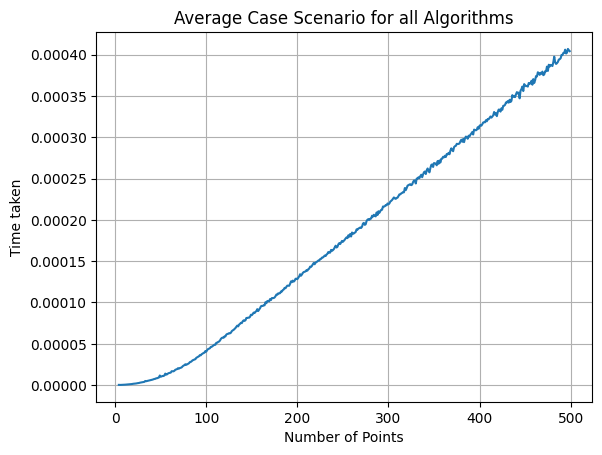

In [10]:
import timeit
import matplotlib.pyplot as plt

%matplotlib inline

class ExperimentalFramework():
    """
    A class to represent an experimental framework.

    ...

    Attributes
    ----------
    
    [to be defined as part of the coursework]

    Methods
    -------
    
    [to be defined as part of the coursework]

    """
        
    #ADD YOUR CODE HERE
    
    def __init__():
        pass


    def testTiming(algo,inputSet):
        loop = 100
        result = timeit.timeit(lambda: algo(inputSet), number = loop, globals=globals())
        return (result/loop)

    def plotGraph1():

        timingsjm = []
        timingsgs = []
        timingsc = []
        for n in range(4, 500):
            inputSet = TestDataGenerator.randomPoints(n)
            #timingsjm.append(ExperimentalFramework.testTiming(jarvismarch, inputSet))
            timingsgs.append(ExperimentalFramework.testTiming(grahamscan, inputSet))
            #timingsc.append(ExperimentalFramework.testTiming(chen, inputSet))

        plt.title("Average Case Scenario for all Algorithms")
        plt.xlabel("Number of Points")
        plt.ylabel("Time taken")
        plt.grid(True)

        #plt.plot(range(4, 500), timingsjm)
        plt.plot(range(4,500), timingsgs)
        #plt.plot(range(4,500), timingsc)


    def plotGraph2():

        timingsjm = []
        timingsgs = []
        timingsc = []
        for n in range(4, 500):
            inputSet = TestDataGenerator.randomPointsCircle(n)
            #timingsjm.append(ExperimentalFramework.testTiming(jarvismarch, inputSet))
            timingsgs.append(ExperimentalFramework.testTiming(grahamscan, inputSet))
            #timingsc.append(ExperimentalFramework.testTiming(chen, inputSet))

        plt.title("Worst Case Scenario for all Algorithms")
        plt.xlabel("Number of Points")
        plt.ylabel("Time taken")
        plt.grid(True)

        #plt.plot(range(4, 500), timingsjm)
        plt.plot(range(4,500), timingsgs)
        #plt.plot(range(4,500), timingsc)

    
    def plotGraph3():

        timingsAC = []
        timingsWC = []
 
        for n in range(4, 500):
            inputSet1 = TestDataGenerator.randomPoints(n)
            inputSet2 = TestDataGenerator.randomPointsCircle(n)
            timingsAC.append(ExperimentalFramework.testTiming(jarvismarch, inputSet1))
            timingsWC.append(ExperimentalFramework.testTiming(jarvismarch, inputSet2))
            

        plt.title("Jarvis March Algorithm")
        plt.xlabel("Number of Points")
        plt.ylabel("Time taken")
        plt.grid(True)

        plt.plot(range(4, 500), timingsAC)
        plt.plot(range(4,500), timingsWC)
        


    def plotGraph4():

        timingsAC = []
        timingsWC = []
 
        for n in range(4, 500):
            inputSet1 = TestDataGenerator.randomPoints(n)
            inputSet2 = TestDataGenerator.randomPointsCircle(n)
            timingsAC.append(ExperimentalFramework.testTiming(grahamscan, inputSet1))
            timingsWC.append(ExperimentalFramework.testTiming(grahamscan, inputSet2))
            

        plt.title("Graham's Scan Algorithm")
        plt.xlabel("Number of Points")
        plt.ylabel("Time taken")
        plt.grid(True)

        plt.plot(range(4, 500), timingsAC)
        plt.plot(range(4,500), timingsWC)


    

    def plotGraph5():

        timingsAC = []
        timingsWC = []
 
        for n in range(4, 500):
            inputSet1 = TestDataGenerator.randomPoints(n)
            inputSet2 = TestDataGenerator.randomPointsCircle(n)
            timingsAC.append(ExperimentalFramework.testTiming(chen, inputSet1))
            timingsWC.append(ExperimentalFramework.testTiming(chen, inputSet2))
            

        plt.title("Chan's Algorithm")
        plt.xlabel("Number of Points")
        plt.ylabel("Time taken")
        plt.grid(True)

        plt.plot(range(4, 500), timingsAC)
        plt.plot(range(4,500), timingsWC)



ExperimentalFramework.plotGraph1()
#ExperimentalFramework.plotGraph2()
#ExperimentalFramework.plotGraph3()
    
        

Use the cell below to illustrate the python code you used to **fully evaluate** the three convex hull algortihms under considerations. The code below should illustrate, for example, how you made used of the **TestDataGenerator** class to generate test data of various size and properties; how you instatiated the **ExperimentalFramework** class to  evaluate each algorithm using such data, collect information about their execution time, plots results, etc. Any results you illustrate in the companion PDF report should have been generated using the code below.

' \nNOTES:\n\n1)JARVIS MARCH MISSING 1 POINT \n\n2)CHAN FAILING \n\n3)1 GRAPH WITH AVG AND WORST CASE FOR EVERY ALGO, 1 GRAPH WITH AVG CASE OF ALL ALGOS, 1 GRAPH WITH WORST CASE OF ALL ALGOS.\n\n4)FIGURE OUT HOW TO PLOT MORE THAN 1 GRAPHS '

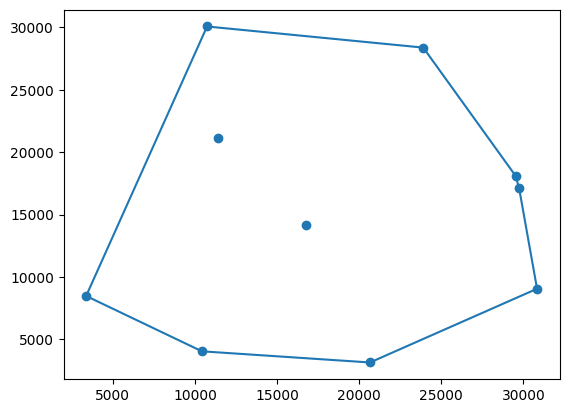

In [38]:
# ADD YOUR TEST CODE HERE 
import matplotlib.pyplot as plt

points = TestDataGenerator.randomPoints(10)

x = [a for a,b in points]
y = [b for a,b in points]
plt.scatter(x,y)

#Graham Scan 
pointsgs = grahamscan(points)
x1 = [a1 for a1,b1 in pointsgs]
y1 = [b1 for a1,b1 in pointsgs]
x1.append(pointsgs[0][0])
y1.append(pointsgs[0][1])
plt.plot(x1,y1)

#Jarvis March
"""pointsjm = jarvismarch(points)
x2 = [a2 for a2,b2 in pointsjm]
y2 = [b2 for a2,b2 in pointsjm]
x2.append(pointsjm[0][0])
y2.append(pointsjm[0][1])
plt.plot(x2,y2)"""

#Chan's
"""pointsch = chen(points)
x3 = [a3 for a3,b3 in pointsch]
y3 = [b3 for a3,b3 in pointsch]
x3.append(pointsch[0][0])
y3.append(pointsch[0][1])
plt.plot(x3,y3)"""

#print(chen(points))
#print(grahamscan(points))
#print(jarvismarch(points))


""" 
NOTES:

1)JARVIS MARCH MISSING 1 POINT 

2)CHAN FAILING 

3)1 GRAPH WITH AVG AND WORST CASE FOR EVERY ALGO, 1 GRAPH WITH AVG CASE OF ALL ALGOS, 1 GRAPH WITH WORST CASE OF ALL ALGOS.

4)FIGURE OUT HOW TO PLOT MORE THAN 1 GRAPHS """